In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dataclasses import dataclass, field, asdict
import argparse

from AOUP import Parameter, AOUP

In [2]:
slope, Lambda, velocity = 0.1, 1.0, 0.1

parameter = Parameter(
    N_particle = 30000,
    N_ensemble = 1,
    velocity = velocity,
    slope = slope,
    Lambda = Lambda,
    boundary = 5.0,
    N_bins = 100,
    gamma = 1.0,
    temperature = 0.0,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = 10000,
    sampling = 100,
    interval = 100,
    degree = 4
)

print(parameter)

Parameter(N_particle=30000, N_ensemble=1, velocity=0.1, Lambda=1.0, boundary=5.0, N_bins=100, gamma=1.0, slope=0.1, temperature=0.0, tau=1.0, Da=1.0, delta_t=0.001, initial=10000, sampling=100, interval=100, degree=4)


In [3]:
aoup = AOUP(parameter)
frames = 100

In [4]:
# aoup.average_distribution(frames=frames)

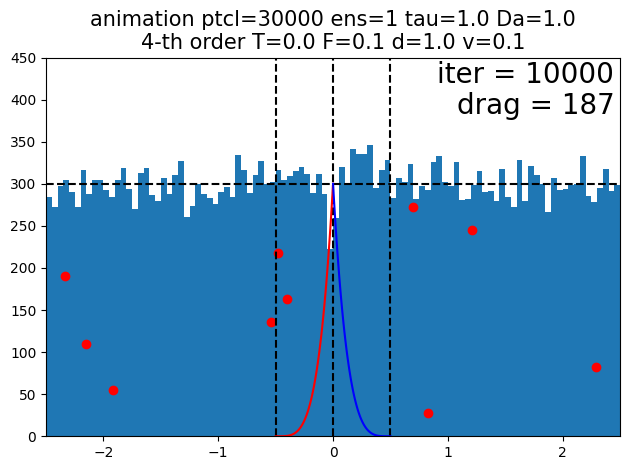

In [5]:
aoup.animate_histogram(frames=frames, fps=10)

In [6]:
# aoup.phase_space(frames=frames)